<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-Libraries" data-toc-modified-id="Loading-the-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the Libraries</a></span></li><li><span><a href="#Utilities" data-toc-modified-id="Utilities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utilities</a></span><ul class="toc-item"><li><span><a href="#Print-Statistics" data-toc-modified-id="Print-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Print Statistics</a></span></li><li><span><a href="#Plot-Routine" data-toc-modified-id="Plot-Routine-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot Routine</a></span></li></ul></li><li><span><a href="#The-Uniform-Distribution" data-toc-modified-id="The-Uniform-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Uniform Distribution</a></span><ul class="toc-item"><li><span><a href="#Visualize-Using-Different-Bin-Sizes" data-toc-modified-id="Visualize-Using-Different-Bin-Sizes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualize Using Different Bin Sizes</a></span></li><li><span><a href="#Using-scipy.stats-Distributions" data-toc-modified-id="Using-scipy.stats-Distributions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using scipy.stats Distributions</a></span></li></ul></li><li><span><a href="#The-Triangular-Distribution" data-toc-modified-id="The-Triangular-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Triangular Distribution</a></span></li><li><span><a href="#Distribution-of-the-Sample-Mean" data-toc-modified-id="Distribution-of-the-Sample-Mean-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution of the Sample Mean</a></span><ul class="toc-item"><li><span><a href="#Create-a-Reference-Data-Set" data-toc-modified-id="Create-a-Reference-Data-Set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create a Reference Data Set</a></span></li><li><span><a href="#Preparations:-Compute-a-sample-mean" data-toc-modified-id="Preparations:-Compute-a-sample-mean-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Preparations: Compute a sample mean</a></span></li><li><span><a href="#Run-a-Simulation" data-toc-modified-id="Run-a-Simulation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Run a Simulation</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Loading the Libraries

In [1]:
import pandas as pd

import scipy as sp
import scipy.stats as stats

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import math
import random 
import statistics 

# Utilities

## Print Statistics

In [2]:
def statistics(d,comment=None):
    print(f"N:{len(d):11,d} ",
          f"Mean:{np.mean(d):6.3f} ",
          f"StdDev:{np.std(d):6.3f} ",
          f"Min:{np.min(d):6.3f} ",
          f"Max:{np.max(d):6.3f} ", 
          "" if comment is None else comment)

## Plot Routine

We will use a plot routine that overlays a histogram with a probability density function (pdf):

In [3]:
def plot(data, pdf=None, bins=None, xmin=None, xmax=None, ymax=None, title=None, fig=None, ax=None):
    
    if fig is None:
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(5)
    
    if ax is None:
        ax = fig.gca()
        
    # set the range on the x-axis
    if xmin is None:
        xmin = math.floor(np.min(data)*10)/10
    if xmax is None:
        xmax = math.ceil(np.max(data)*10)/10
        
    ax.set_xlim(xmin, xmax)
    
    if ymax is not None:
        ax.set_ylim(0, ymax)
    
    if title is not None:
        plt.title(title)
        
    plt.hist(data, bins=bins, density=True)
    
    μ = np.mean(data)
    σ = np.std(data)
    
    ax.axvline(x=μ, color='red', linestyle='dashed', lw=2)
    ax.axvline(x=μ+σ, color='red', linestyle='dotted')
    ax.axvline(x=μ-σ, color='red', linestyle='dotted')
    
    # plot the probability density function if one is given
    if pdf!=None:
        X = [ i/1000 for i in range(int(xmin*1000), int(xmax*1000)) ]
        Y = [ pdf(x) for x in X]
        plt.plot(X, Y, lw=2, color='red')
    

    plt.grid(True)
    plt.plot()

# The Uniform Distribution

Generate $N$ random numbers uniformly distributed over $[-1, +1]$ and check the statistics:

In [4]:
N = 100000
r = [ random.uniform(-1, +1) for i in range(N) ]
statistics(r)

N:    100,000  Mean: 0.001  StdDev: 0.577  Min:-1.000  Max: 1.000  


*Exercise:* Adjust the interval borders, so that the random values have the mean of 0 and a standard deviation of 1:

## Visualize Using Different Bin Sizes

Smaller bin sizes result in a more rugged, more random appearance:

The [hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) method returns (among other data) the atual bin sizes.

Average bin size 5000, deviation of bin sizes ±3%


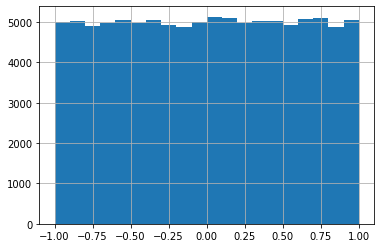

In [5]:
bsizes, _, _ = plt.hist(r, bins=20)
plt.grid(True)
print(f"Average bin size {np.mean(bsizes):2.0f}, deviation of bin sizes ±{100*(max(bsizes)-min(bsizes))/(2*np.mean(bsizes)):1.0f}%")

Average bin size 500, deviation of bin sizes ±12%


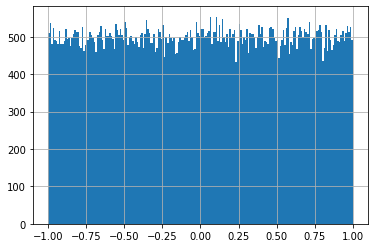

In [6]:
bsizes, _, _ = plt.hist(r, bins=200)
plt.grid(True)
print(f"Average bin size {np.mean(bsizes):2.0f}, deviation of bin sizes ±{100*(max(bsizes)-min(bsizes))/(2*np.mean(bsizes)):1.0f}%")

Average bin size 50, deviation of bin sizes ±47%


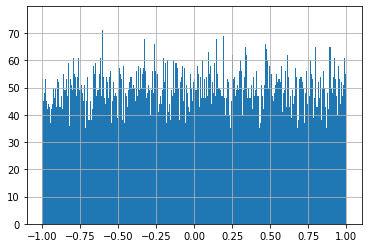

In [7]:
bsizes, _, _ = plt.hist(r, bins=2000)
plt.grid(True)
print(f"Average bin size {np.mean(bsizes):2.0f}, deviation of bin sizes ±{100*(max(bsizes)-min(bsizes))/(2*np.mean(bsizes)):1.0f}%")

`uniform(a,b)` returns a *probability density function* ([pdf](https://en.wikipedia.org/wiki/Probability_density_function)) for a continuous random variable 

In [8]:
def uniform(a,b):
    return lambda x: 0 if x<a or x>b else 1/(b-a)

N:     10,000  Mean: 0.002  StdDev: 0.997  Min:-1.732  Max: 1.732  


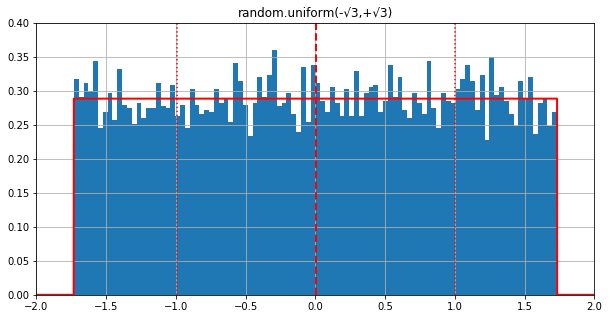

In [9]:
random.seed(0)
N = 10000
r3=math.sqrt(3)
r = [ random.uniform(-r3, +r3) for i in range(N) ]
statistics(r)
plot(r, pdf=uniform(-r3,+r3), title='random.uniform(-√3,+√3)', 
     bins=100, xmin=-2, xmax=+2, ymax=0.4)

## Using scipy.stats Distributions

Instead of using our own pdf function and the uniform random number generator `random.uniform` method in the standard package [random](https://docs.python.org/3/library/random.html), we could make use of the predefined standard distributions 
[uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) in the package [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

Here we create a 'frozen' instance `uni` of the uniform distribution (with parameters `stats.uniform(loc=-1, scale=2)` and use `uni.rvs(N)` to generate the list of random numbers, and `uni.pdf` as probability density function.


Here we choose again a uniform distribution with $\mu=0$ and $\sigma=1$. Note that the random data are (albeit slightly) different.

N:     10,000  Mean: 0.005  StdDev: 0.998  Min:-1.732  Max: 1.731  


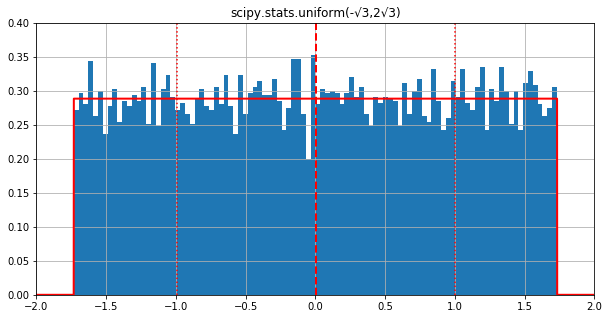

In [10]:
random.seed(0)
N = 10000
uni = stats.uniform(-math.sqrt(3), 2*math.sqrt(3))
r = uni.rvs(N).tolist()
statistics(r)
plot(r, pdf=uni.pdf, title='scipy.stats.uniform(-√3,2√3)', 
     bins=100, xmin=-2, xmax=+2, ymax=0.4)

# The Triangular Distribution

Documentation: [scipy.stats.triang](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang). Again we choose parameters so that the mean is 0 and the standard deviation is 1.

N:    100,000  Mean: 0.001  StdDev: 1.002  Min:-2.817  Max: 1.414  


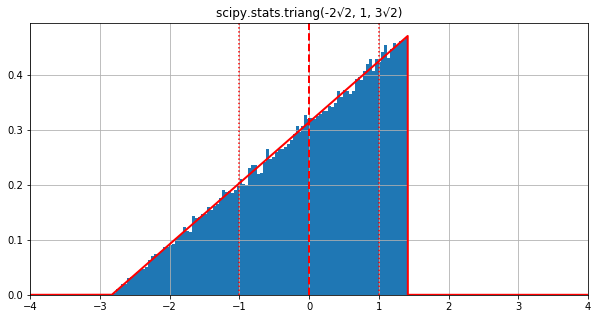

In [11]:
N = 100000
triangular = stats.triang(loc=-2*math.sqrt(2), c=1, scale=3*math.sqrt(2))
r = triangular.rvs(N).tolist()
statistics(r)
plot(r, pdf=triangular.pdf, title='scipy.stats.triang(-2√2, 1, 3√2)', bins=100, xmin=-4, xmax=+4)

# Distribution of the Sample Mean

## Create a Reference Data Set

In a simulation study it is sometimes useful to "freeze" a particular distributions and re-use the very same  data over and over again. One could for example create at the beginning a pandas data frame `rd` and generate uniform random numbers with the mean 0 and standard deviation 1 based on a particular seed value.

In [12]:
rd = pd.DataFrame()

random.seed(0)
N = 1000000

uni = stats.uniform(-math.sqrt(3), 2*math.sqrt(3))
rd["Uniform"]=uni.rvs(N)

triangular = stats.triang(loc=-2*math.sqrt(2), c=1, scale=3*math.sqrt(2))
rd['Triangular']=triangular.rvs(N)

In [13]:
statistics(rd['Uniform'])

N:  1,000,000  Mean: 0.000  StdDev: 1.000  Min:-1.732  Max: 1.732  


In [14]:
statistics(rd['Triangular'])

N:  1,000,000  Mean: 0.001  StdDev: 1.000  Min:-2.828  Max: 1.414  


Later one can refer at any stage (and independent of the current state of the random number generator) back to the same random values. This centralises the generation of random values and avoids mistakes in keeping the statistics parameter aligned.

In [15]:
p = rd['Uniform'].tolist()
statistics(p)

N:  1,000,000  Mean: 0.000  StdDev: 1.000  Min:-1.732  Max: 1.732  


## Preparations: Compute a sample mean

Extract random values from the pandas column and pick a random sample of a given size from that list to dompute the sample mean using [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [16]:
random.seed(0)
sample_size=1000
p = rd['Uniform'].tolist()
for i in range(5):
    sample = random.sample(p, sample_size)
    print(f"{np.mean(sample):6.3f}")

-0.065
 0.036
-0.010
-0.003
 0.018


Create a short hand notation:

In [17]:
def sample_mean(p, sample_size):
    return np.mean(random.sample(p, sample_size))

## Run a Simulation

To allow manage reproducibility of results, fix an arbitrary seed value.

In [18]:
random.seed(42)

Define what it means to run a simulation. In this case to pick a sample of the given size and compute the arithmetic mean of the sample. Set the number of simulation runs, run the required simulations and record the results in a DataFrame:

Set the number of simulation runs, run the simulations and record the result of the simulations in a DataFrame:

Plot the simulation results:

N:  1,000,000  Mean: 0.000  StdDev: 1.000  Min:-1.732  Max: 1.732  
N:     10,000  Mean: 0.001  StdDev: 0.198  Min:-0.652  Max: 0.734  


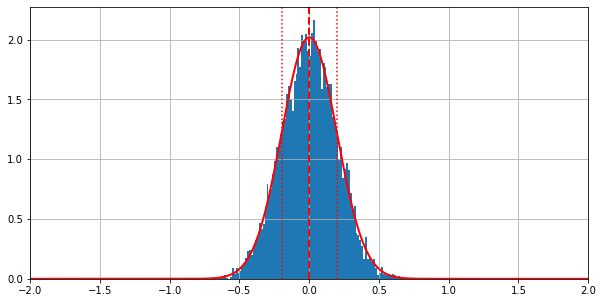

In [19]:
p = rd['Uniform'].tolist()
statistics(p)

K=10000
sample_size=25
m = [ sample_mean(p, sample_size) for i in range(K) ]
statistics(m)
sm = np.mean(m)
ss = np.std(m)
plot(m, bins=100, pdf=stats.norm(sm,ss).pdf, xmin=-2, xmax=2)

N:  1,000,000  Mean: 0.001  StdDev: 1.000  Min:-2.828  Max: 1.414  
N:     10,000  Mean: 0.001  StdDev: 0.200  Min:-0.840  Max: 0.654  


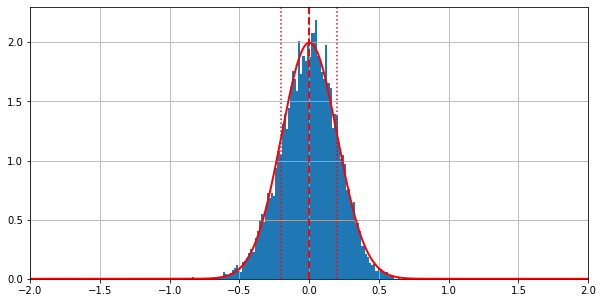

In [20]:
t=rd['Triangular'].tolist()
statistics(t)

K=10000
sample_size=25
m = [ sample_mean(t, sample_size) for i in range(K) ]
statistics(m)
sm = np.mean(m)
ss = np.std(m)
plot(m, bins=100, pdf=stats.norm(sm,ss).pdf, xmin=-2, xmax=2)

In [21]:
def combiplot(r, K, sample_size, xmin=None, xmax=None, fig=None, ax=None):
    
    d = [ sample_mean(r, sample_size) for i in range(K) ]
    statistics(d,f"(Sample Size: {sample_size:2,d})")
    
    μ = np.mean(d)
    σ = np.std(d)
        
    plot(d, bins=100, 
         pdf=stats.norm(μ, σ).pdf, 
         title=f"Mean of {K:2,d} Samples of Size={sample_size:2,d}",
         xmin=xmin, xmax=xmax, fig=fig, ax=ax)

N:  1,000,000  Mean: 0.000  StdDev: 1.000  Min:-1.732  Max: 1.732  (Uniform Population)
N:     50,000  Mean:-0.001  StdDev: 0.224  Min:-0.950  Max: 0.825  (Sample Size: 20)


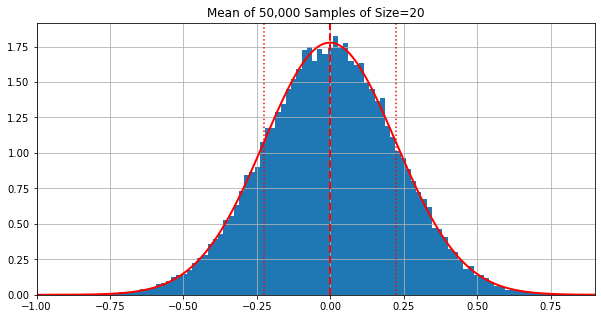

In [22]:
u = rd['Uniform'].tolist()
statistics(u, "(Uniform Population)")

random.seed(1)
K = 50000
sample_size = 20
combiplot(u, K, sample_size)

N:  1,000,000  Mean: 0.001  StdDev: 1.000  Min:-2.828  Max: 1.414  (Triangular Population)
N:     50,000  Mean: 0.001  StdDev: 0.224  Min:-1.118  Max: 0.809  (Sample Size: 20)


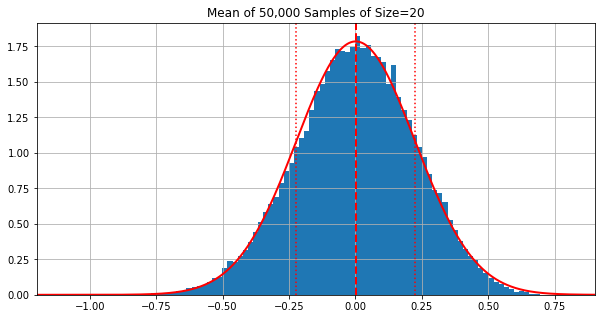

In [23]:
t = rd['Triangular'].tolist()
statistics(t, "(Triangular Population)")

random.seed(1)
K = 50000
sample_size = 20

combiplot(t, K, sample_size)

N:  1,000,000  Mean: 0.000  StdDev: 1.000  Min:-1.732  Max: 1.732  (Population)
N:      5,000  Mean:-0.013  StdDev: 0.314  Min:-1.071  Max: 0.977  (Sample Size: 10)
N:      5,000  Mean:-0.000  StdDev: 0.141  Min:-0.477  Max: 0.475  (Sample Size: 50)
N:      5,000  Mean: 0.003  StdDev: 0.101  Min:-0.372  Max: 0.470  (Sample Size: 100)
N:      5,000  Mean:-0.000  StdDev: 0.045  Min:-0.199  Max: 0.180  (Sample Size: 500)
N:      5,000  Mean: 0.000  StdDev: 0.032  Min:-0.108  Max: 0.119  (Sample Size: 1,000)
N:      5,000  Mean: 0.001  StdDev: 0.014  Min:-0.063  Max: 0.048  (Sample Size: 5,000)


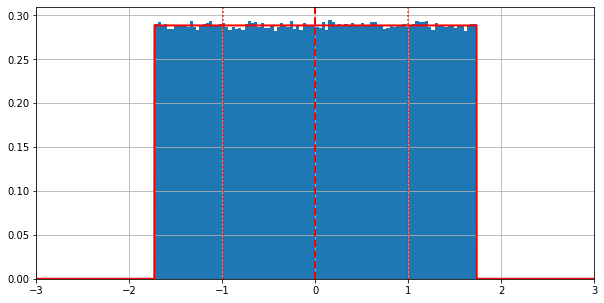

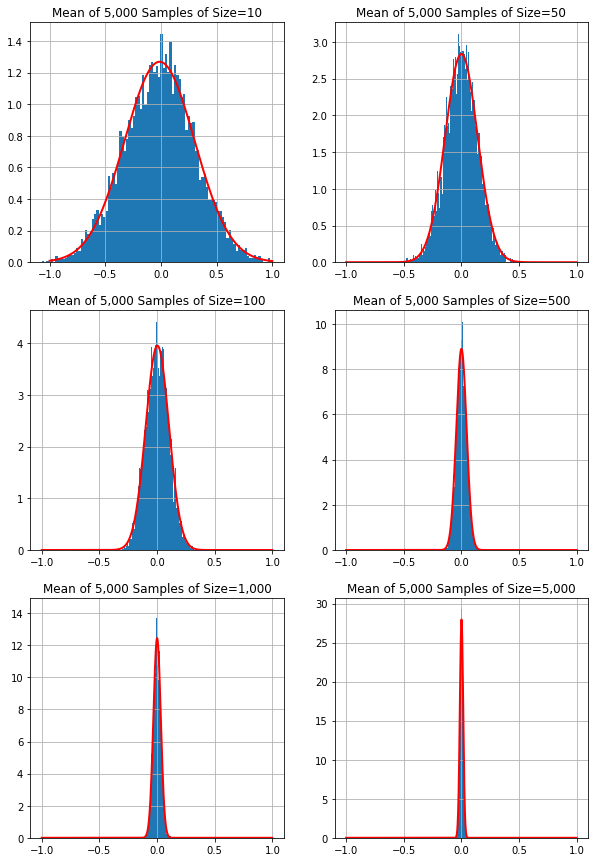

In [24]:
r = rd['Uniform'].tolist()
statistics(r, "(Population)")
plot(r, bins=100, pdf=uni.pdf, xmin=-3, xmax=3)

K = 5000

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sample_sizes = [10, 50, 100, 500, 1000, 5000]

s = 0
for ax_row in axs:
    for ax in ax_row:
        sample_size = sample_sizes[s]
        s+=1
        plt.subplot(3, 2, s)
        combiplot(r, K, sample_size, fig=fig, ax=ax, xmin=-1, xmax=1)
    

Play around with the simulation for different sample size and add more columns as you feel appropriate.

In [25]:
p = rd['Uniform'].tolist()

sample_size=50

K=10000
results = pd.DataFrame()
results['S50'] = [ sample_mean(p, sample_size) for i in range(K) ]

There are multiple ways to compute the mean and standard deviation: 
[numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)
[statistics.stdev](https://docs.python.org/3/library/statistics.html#statistics.stdev)

In [26]:
results.head()

,S50
0,0.043087
1,-0.112145
2,0.136017
3,-0.047982
4,-0.107531


N:     10,000  Mean:-0.001  StdDev: 0.140  Min:-0.522  Max: 0.473  


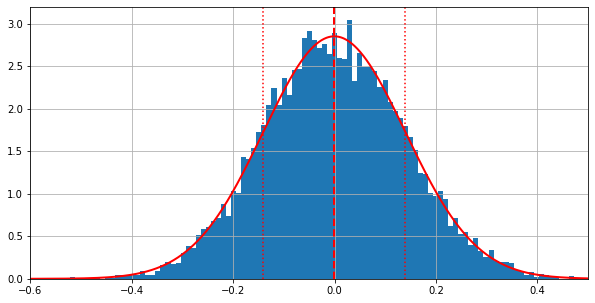

In [27]:
sm=results['S50'].tolist()
statistics(sm)
plot(sm, pdf=stats.norm(np.mean(sm), np.std(sm)).pdf, bins=100)

# References

- Python [home](https://python.org) [doc](https://docs.python.org/3/)
- Pandas  [home](https://pandas.pydata.org) [doc](https://pandas.pydata.org/docs/reference/index.html)
- Matplotlib [home](https://matplotlib.org) [doc](https://matplotlib.org/api/index.html) [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- SciPy [home](https://www.scipy.org) [doc](https://docs.scipy.org/doc/scipy/reference/) [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- Standard Libraries [random](https://docs.python.org/3/library/random.html)
  [statistics](https://docs.python.org/3/library/statistics.html)